<a href="https://colab.research.google.com/github/IvoneySilva/100-days-of-javascript/blob/master/Showcase_Finding_Support_and_Resistance_Levels_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing packages that do not come as default with Google Colab
!pip install yfinance
!pip install mpl_finance

In [ ]:
# Importing necessary python libraries for this project
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
# Obtaining historical stock pricing data
ticker_symbol = 'IBM'
ticker = yfinance.Ticker(ticker_symbol)

start_date = '2023-11-01'
end_date = '2024-01-14'

df = ticker.history(interval='1d', start=start_date, end=end_date)

df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

df

,Date,Open,High,Low,Close
Date,,,,,
2023-11-01 00:00:00-04:00,19662.166667,143.373977,144.867039,142.830142,143.769485
2023-11-02 00:00:00-04:00,19663.166667,144.135350,145.450437,143.215771,145.361435
2023-11-03 00:00:00-04:00,19664.166667,145.796504,146.785290,145.628413,146.241455
2023-11-06 00:00:00-05:00,19667.208333,146.231563,147.556533,146.192018,147.299454
2023-11-07 00:00:00-05:00,19668.208333,147.358780,147.605977,146.369994,147.161026
2023-11-08 00:00:00-05:00,19669.208333,147.576315,148.001486,145.934927,146.369995
2023-11-09 00:00:00-05:00,19670.208333,146.550003,146.990005,145.279999,146.619995
2023-11-10 00:00:00-05:00,19671.208333,147.440002,149.169998,146.850006,149.020004
2023-11-13 00:00:00-05:00,19674.208333,148.460007,148.490005,147.350006,148.100006


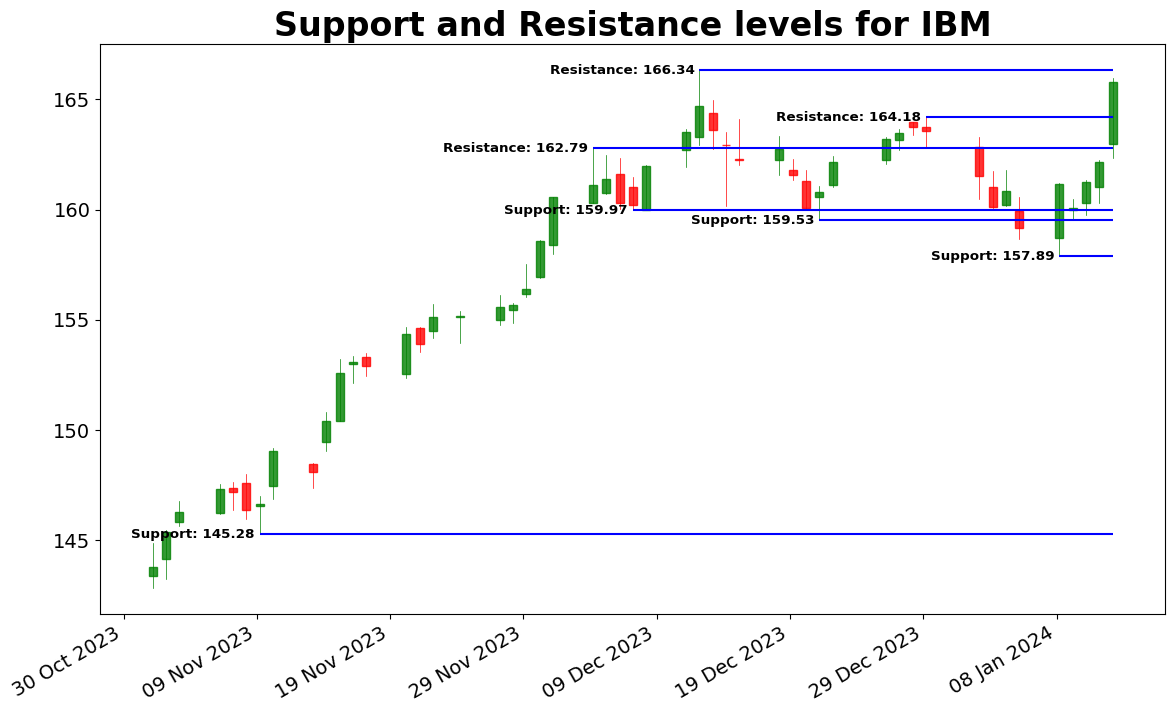

In [ ]:
# Create two functions to calculate if a level is SUPPORT or a RESISTANCE level through fractal identification
def is_Suppport_Level(df, i):
  support = df['Low'][i] < df['Low'][i - 1] and df['Low'][i] < df['Low'][i + 1] and df['Low'][i + 1] < df['Low'][i + 2] and df['Low'][i - 1] < df['Low'][i - 2]
  return support


def is_Resistance_Level(df, i):
  resistance = df['High'][i] > df['High'][i - 1] and df['High'][i] > df['High'][i + 1] and df['High'][i + 1] > df['High'][i + 2] and df['High'][i - 1] > df['High'][i - 2]
  return resistance

# Creating a list and feeding it the identified support and resistance levels via the Support and Resistance functions
levels = []
level_types = []
for i in range(2, df.shape[0] - 2):

  if is_Suppport_Level(df, i):
    levels.append((i, df['Low'][i].round(2)))
    level_types.append('Support')

  elif is_Resistance_Level(df, i):
    levels.append((i, df['High'][i].round(2)))
    level_types.append('Resistance')

# Plotting the data
def plot_levels():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax, df.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()

  for level, level_type in zip(levels, level_types):
    plt.hlines(level[1],
               xmin = df['Date'][level[0]],
               xmax = max(df['Date']),
               colors = 'blue')
    plt.text(df['Date'][level[0]], level[1], (str(level_type) + ': ' + str(level[1]) + ' '), ha='right', va='center', fontweight='bold', fontsize='x-small')
    plt.title('Support and Resistance levels for ' + ticker_symbol, fontsize=24, fontweight='bold')
    fig.show()

plot_levels()

In [ ]:
# Clean noise in data by discarding a level if it is near another
# (i.e. if distance to the next level is less than the average candle size for any given day - this will give a rough estimate on volatility)
mean = np.mean(df['High'] - df['Low'])

# This function, given a price value, returns True or False depending on if it is too near to some previously discovered key level.
def distance_from_mean(level):
  return np.sum([abs(level - y) < mean for y in levels]) == 0

NameError: name 'df' is not defined

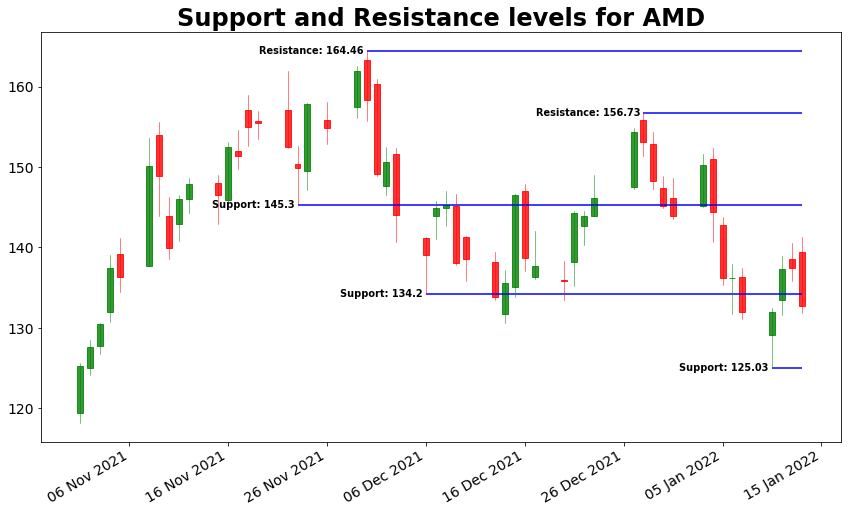

In [ ]:
# Optimizing the analysis by adjusting the data and eliminating the noise from volatility that is causing multiple levels to show/overlapp
levels = []
level_types = []
for i in range(2, df.shape[0] - 2):

  if is_Suppport_Level(df, i):
    level = df['Low'][i].round(2)

    if distance_from_mean(level):
      levels.append((i, level))
      level_types.append('Support')

  elif is_Resistance_Level(df, i):
    level = df['High'][i].round(2)

    if distance_from_mean(level):
      levels.append((i, level))
      level_types.append('Resistance')

plot_levels()